In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [87]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [88]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [89]:
numerical_data= df.select_dtypes(include=["int","float"])
for x in numerical_data:
    df[x].fillna(np.mean(df[x]), inplace=True)    
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [90]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No,No


In [91]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

In [92]:
category = df.select_dtypes(include=['object','category'])
encoder = LabelEncoder()
for x in category:
    df[x] = encoder.fit_transform(df[x])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0
1,397,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0
2,398,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0
3,399,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0
4,400,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


In [93]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [94]:
df2 = df[['Sunshine','Rainfall','MinTemp']]
corr = df2.corr()
corr

,Sunshine,Rainfall,MinTemp
Sunshine,1.000000,-0.170973,0.051297
Rainfall,-0.170973,1.000000,0.102706
MinTemp,0.051297,0.102706,1.000000


<Axes: >

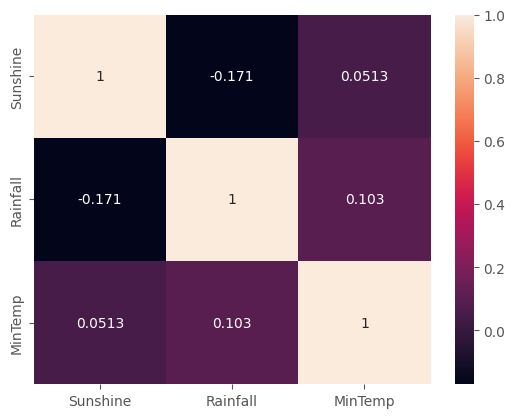

In [95]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [96]:
df2 = df[['MaxTemp','Rainfall','Evaporation']]
corr = df2.corr()
corr

,MaxTemp,Rainfall,Evaporation
MaxTemp,1.000000,-0.074040,0.438653
Rainfall,-0.074040,1.000000,-0.037863
Evaporation,0.438653,-0.037863,1.000000


<Axes: >

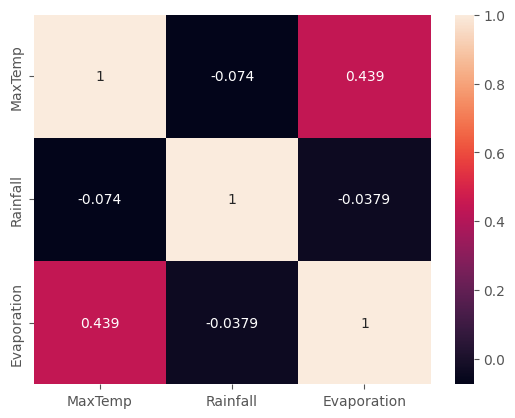

In [97]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [98]:
df2 = df[['WindGustSpeed','Rainfall','WindDir9am']]
corr = df2.corr()
corr

,WindGustSpeed,Rainfall,WindDir9am
WindGustSpeed,1.000000,0.126446,-0.048865
Rainfall,0.126446,1.000000,0.064689
WindDir9am,-0.048865,0.064689,1.000000


<Axes: >

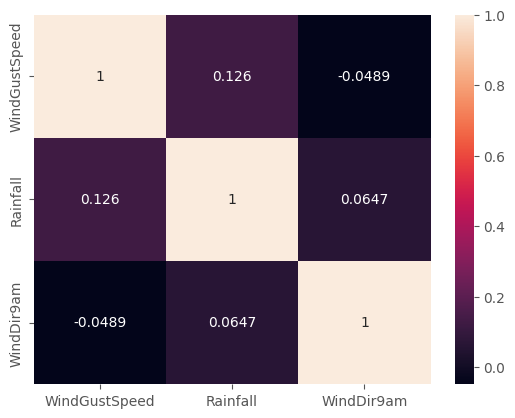

In [99]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [100]:
df2 = df[['Humidity9am','Rainfall','Humidity9am']]
corr = df2.corr()
corr

,Humidity9am,Rainfall,Humidity9am
Humidity9am,1.00000,0.22138,1.00000
Rainfall,0.22138,1.00000,0.22138
Humidity9am,1.00000,0.22138,1.00000


<Axes: >

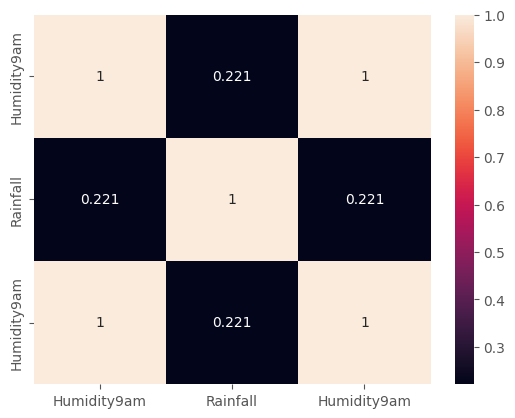

In [101]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

In [102]:
df2 = df[['RainToday','Rainfall','RainTomorrow']]
corr = df2.corr()
corr

,RainToday,Rainfall,RainTomorrow
RainToday,1.000000,0.422883,0.404622
Rainfall,0.422883,1.000000,0.202978
RainTomorrow,0.404622,0.202978,1.000000


<Axes: >

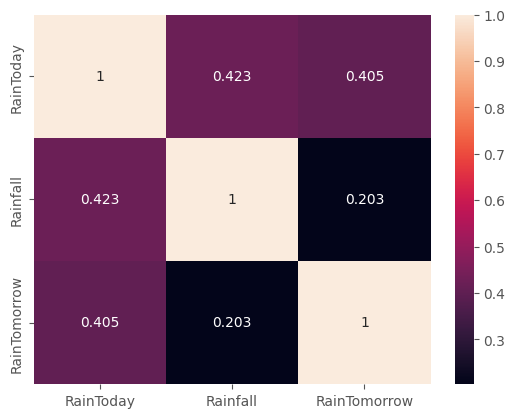

In [103]:
sns.heatmap(corr,annot=True, fmt = '0.3g')

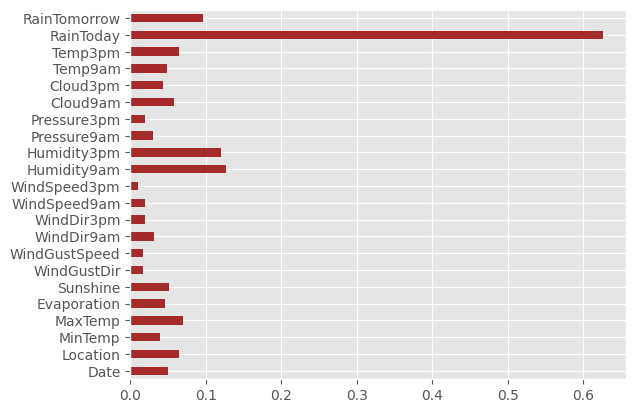

In [104]:
x = df.drop(['Rainfall'], axis = 1)
y = df['Rainfall']
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(x,y)
feature_impor = pd.Series(importance,x.columns[0:len(x.columns)])
feature_impor.plot(kind = 'barh', color = 'brown')
plt.show()

In [109]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2,random_state=1)

In [ ]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(xtrain,ytrain)

In [ ]:
pred1 = logreg.predict(xtest)
pred1

In [ ]:
print((classification_report)(ytest,pred1))

In [ ]:
print(recall_score(ytest,pred1, average='weighted'))
print(f1_score(ytest,pred1, average='weighted'))
print(precision_score(ytest,pred1, average='weighted'))